数据来着：https://www.heywhale.com/mw/dataset/5d26cf27688d36002c58c790


数据说明：
第一列：公司代表样本公司。
第二列：时间显示数据所属的不同时间段。每家公司的时间序列长度在1到14之间。
第三列：目标变量用“财务困境”表示，如果它大于-0.50，公司应被视为健康（0）。否则，它将被视为财务困境（1）。
第四列到最后一列：x1到x83表示的特征是抽样公司的一些财务和非财务特征。这些特征属于前一时期，应该用于预测公司是否会陷入财务困境（分类）。特征x80是一个分类变量。


我做的是对特征进行处理与筛选，然后预测公司是否有“财务困难”

In [1]:
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', None)
figsize = [[],[]]
figsize[0] = 24
figsize[1] = 36
plt.rcParams['figure.figsize'] = figsize

读入数据

In [3]:
filename = 'D:\Program_file\Python-File\Financial Distress.csv'
dataset_raw = read_csv(filename)
names = list(dataset_raw.columns.values)
print(dataset_raw.head())
dataset_raw.shape

   Company  Time  Financial Distress      x1        x2       x3       x4  \
0        1     1            0.010636  1.2810  0.022934  0.87454  1.21640   
1        1     2           -0.455970  1.2700  0.006454  0.82067  1.00490   
2        1     3           -0.325390  1.0529 -0.059379  0.92242  0.72926   
3        1     4           -0.566570  1.1131 -0.015229  0.85888  0.80974   
4        2     1            1.357300  1.0623  0.107020  0.81460  0.83593   

         x5        x6       x7        x8        x9       x10      x11  \
0  0.060940  0.188270  0.52510  0.018854  0.182790  0.006449  0.85822   
1 -0.014080  0.181040  0.62288  0.006423  0.035991  0.001795  0.85152   
2  0.020476  0.044865  0.43292 -0.081423 -0.765400 -0.054324  0.89314   
3  0.076037  0.091033  0.67546 -0.018807 -0.107910 -0.065316  0.89581   
4  0.199960  0.047800  0.74200  0.128030  0.577250  0.094075  0.81549   

       x12       x13      x14     x15       x16     x17       x18       x19  \
0  2.00580  0.125460   6.

(3672, 86)

删除无用列

In [4]:
DropColumns = ['Company', 'Time', 'x80']
dataset = dataset_raw.copy()
dataset.drop(DropColumns, axis=1, inplace=True)
print(dataset.head(10))
print(dataset.shape)

   Financial Distress       x1        x2       x3       x4        x5  \
0            0.010636  1.28100  0.022934  0.87454  1.21640  0.060940   
1           -0.455970  1.27000  0.006454  0.82067  1.00490 -0.014080   
2           -0.325390  1.05290 -0.059379  0.92242  0.72926  0.020476   
3           -0.566570  1.11310 -0.015229  0.85888  0.80974  0.076037   
4            1.357300  1.06230  0.107020  0.81460  0.83593  0.199960   
5            0.007188  1.05580  0.081916  0.87949  0.68673  0.142630   
6            1.200200  0.97059  0.076064  0.90677  0.80980  0.165920   
7            2.234800  1.05900  0.130200  0.81811  0.87599  0.234450   
8            1.340500  1.12450  0.147840  0.75871  1.07990  0.276440   
9            2.047400  1.59980  0.262460  0.54615  1.31270  0.369480   

         x6       x7        x8        x9       x10      x11       x12  \
0  0.188270  0.52510  0.018854  0.182790  0.006449  0.85822   2.00580   
1  0.181040  0.62288  0.006423  0.035991  0.001795  0.85152  

展示数据格式

In [5]:
dataset.dtypes

Financial Distress    float64
x1                    float64
x2                    float64
x3                    float64
x4                    float64
                       ...   
x78                   float64
x79                   float64
x81                   float64
x82                     int64
x83                     int64
Length: 83, dtype: object

数据概况

In [6]:
print(dataset.describe())

       Financial Distress           x1           x2           x3  \
count         3672.000000  3672.000000  3672.000000  3672.000000   
mean             1.040257     1.387820     0.129706     0.615769   
std              2.652227     1.452926     0.120013     0.177904   
min             -8.631700     0.075170    -0.258080     0.016135   
25%              0.172275     0.952145     0.048701     0.501888   
50%              0.583805     1.183600     0.107530     0.638690   
75%              1.351750     1.506475     0.188685     0.749425   
max            128.400000    51.954000     0.749410     0.967900   

                 x4           x5           x6           x7             x8  \
count  3.672000e+03  3672.000000  3672.000000  3672.000000    3672.000000   
mean   8.681599e-01     0.154949     0.106717     0.784031      39.274361   
std    5.719519e-01     0.124904     0.210555     1.033606    4305.688039   
min    5.350000e-07    -0.269790    -0.627750     0.035160 -145000.000000   
25

各特征的直方图

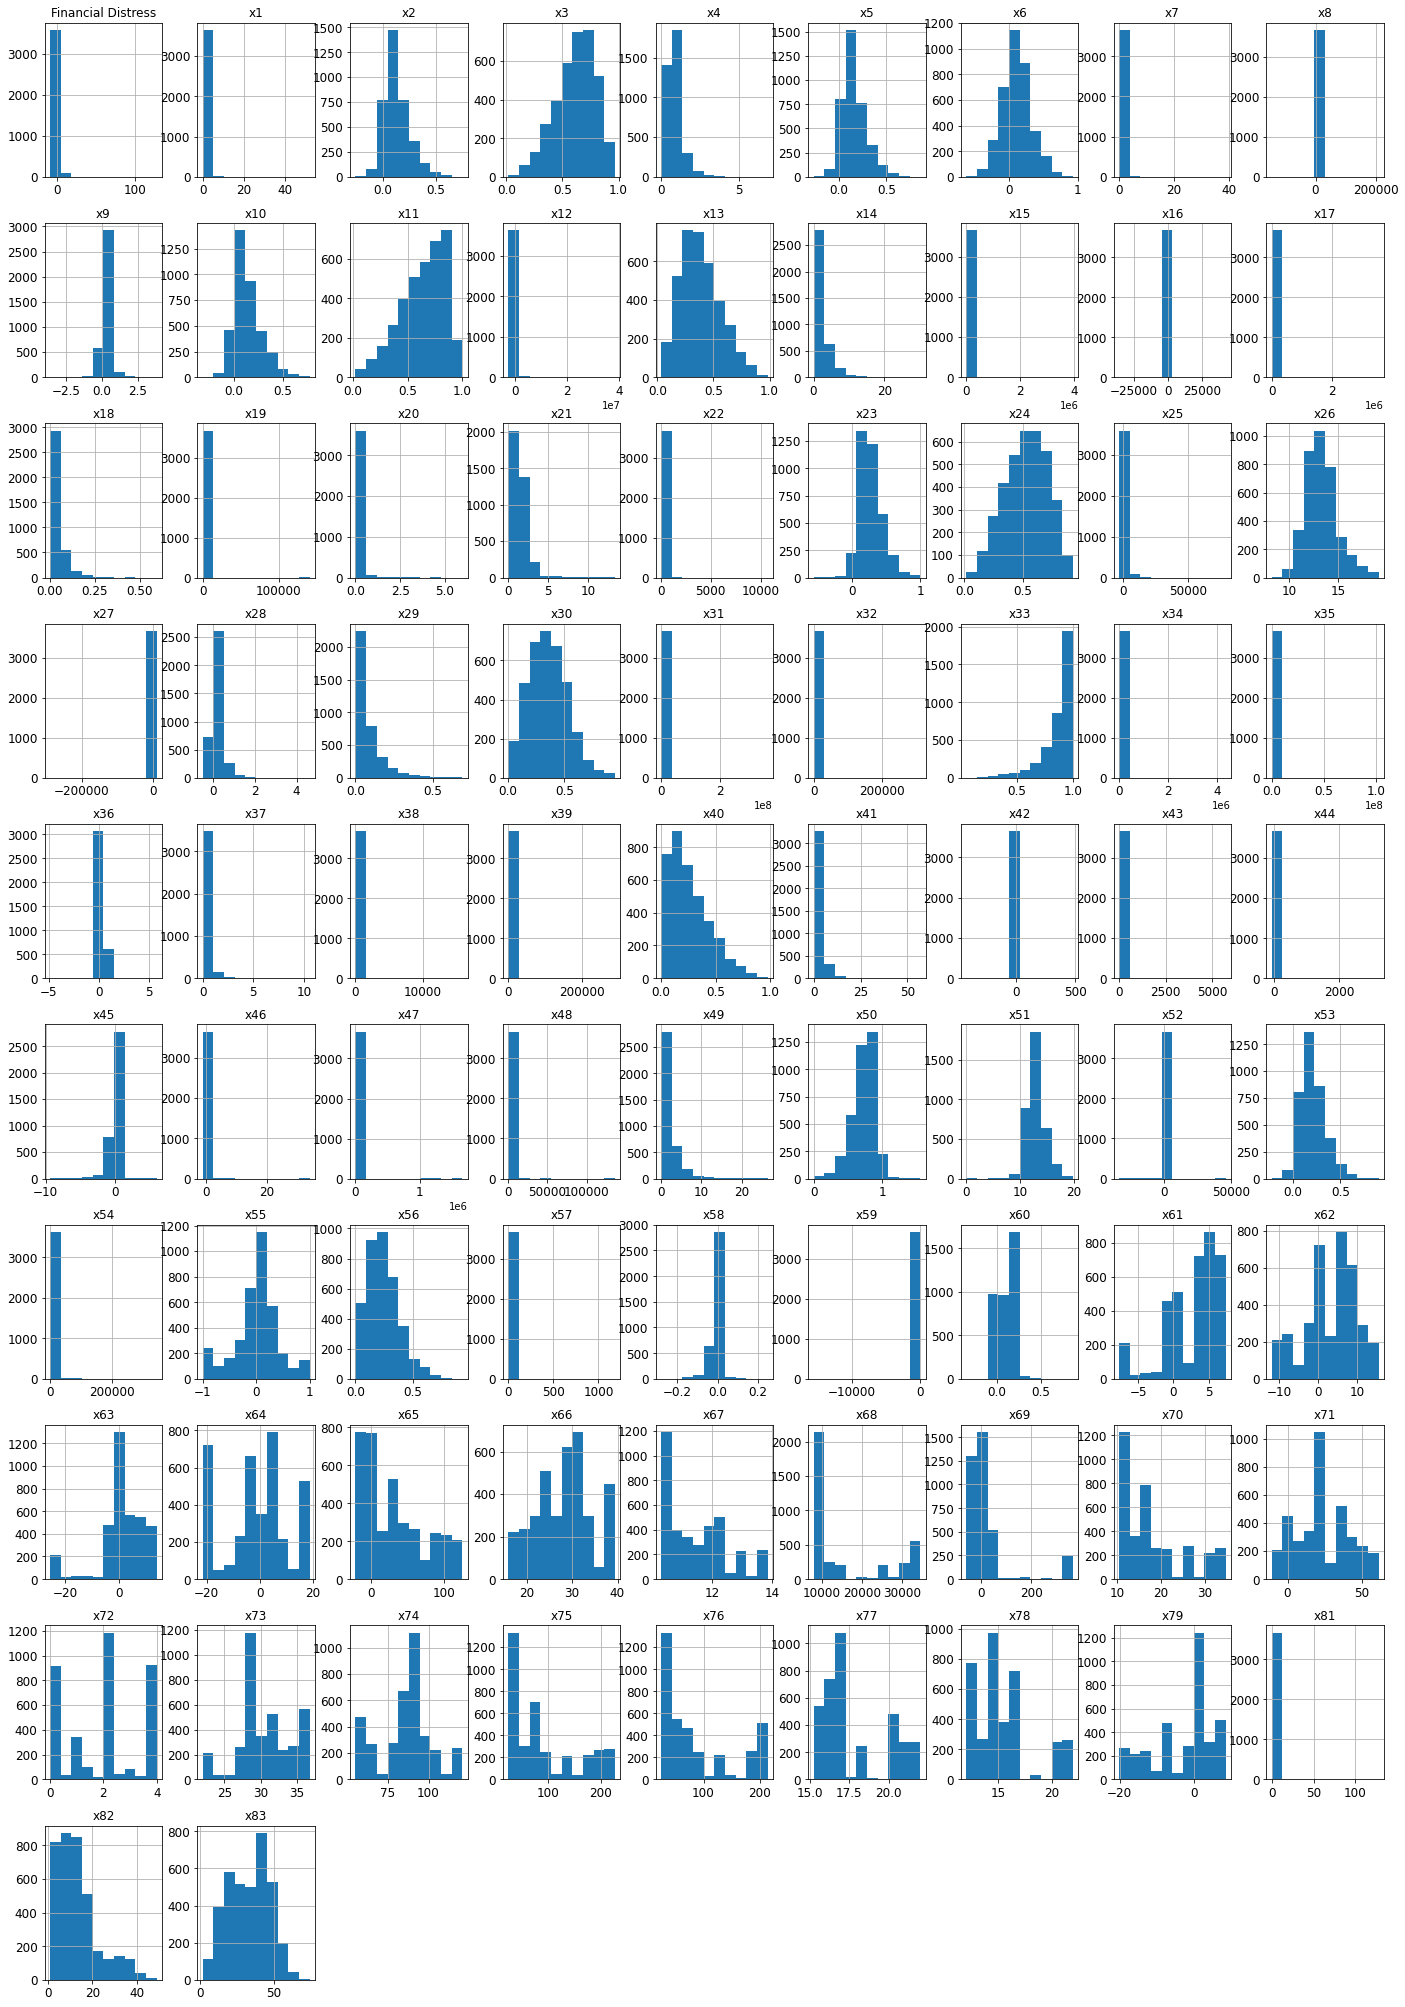

In [7]:
figsize[0] = 24
figsize[1] = 36
plt.rcParams['figure.figsize'] = figsize
dataset.hist(sharex=False, sharey=False, xlabelsize=12, ylabelsize=12)
plt.show()

各特征的箱型图，可以看到有很多特征的奇特值较多

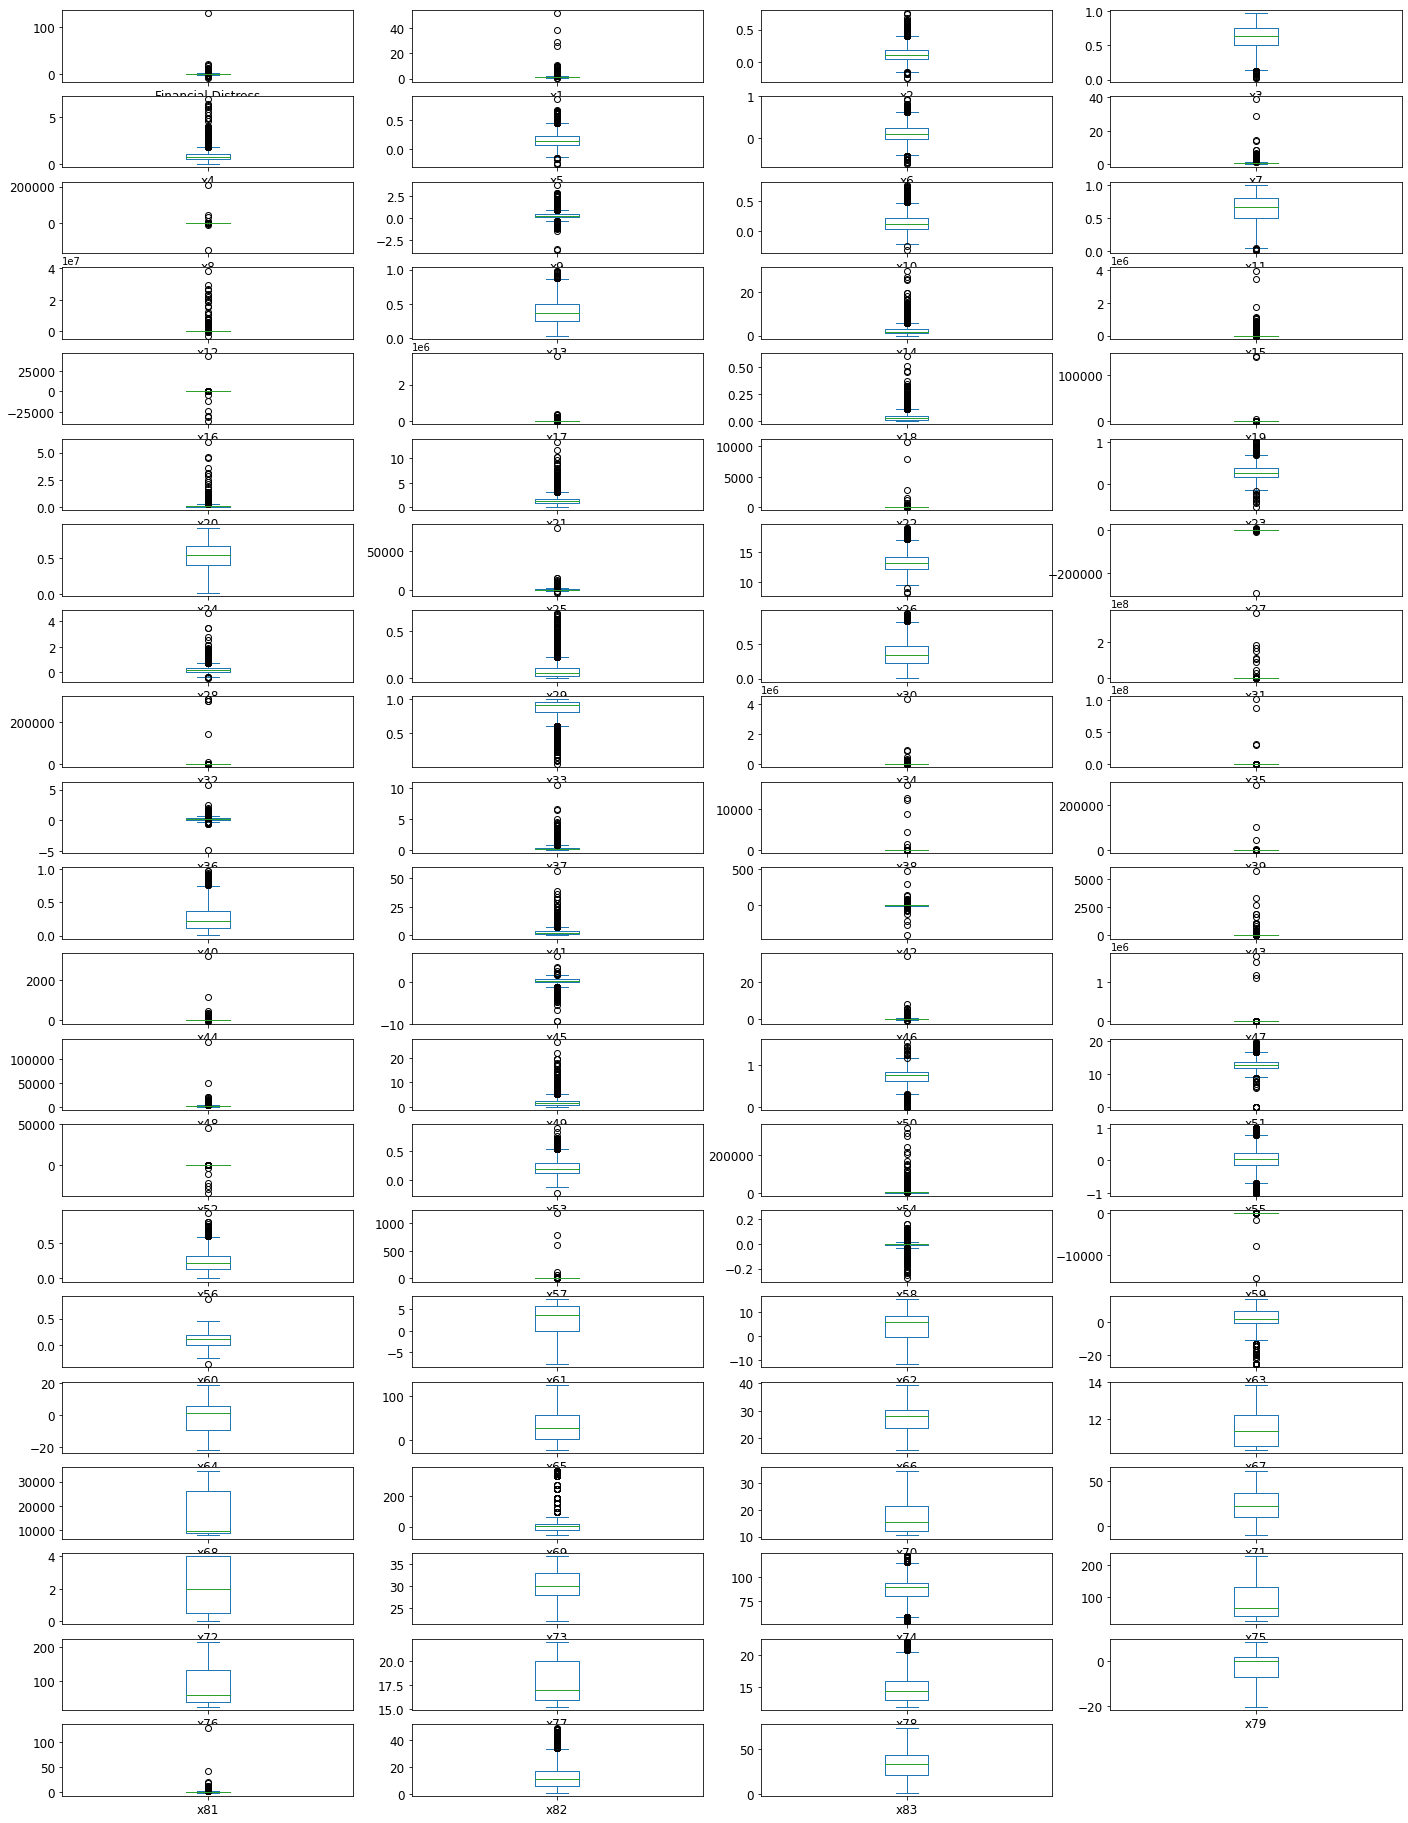

In [8]:
dataset.plot(kind='box', subplots=True, layout=(23,4), sharex=False, sharey=False, fontsize=12)
plt.show()

各特征与经营情况的相关系数，可以看出许多特征与经营情况的相关性不高

No handles with labels found to put in legend.


<Figure size 1728x2592 with 0 Axes>

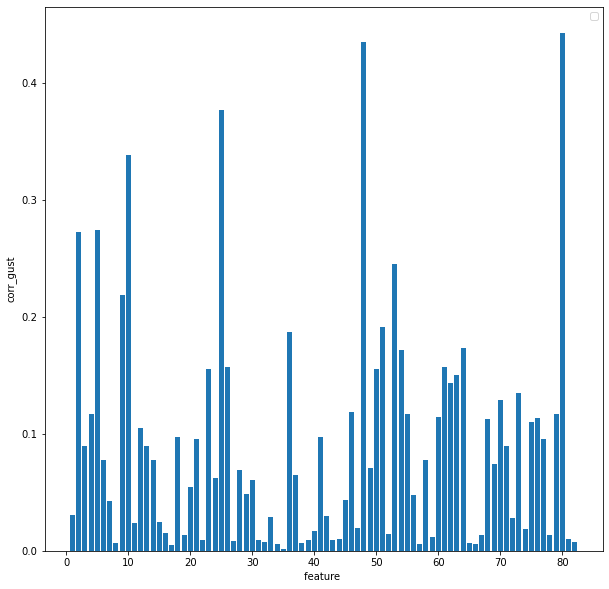

In [9]:
array = dataset.values

dx=[]
dy=[]

for i in range(1,83):
    g_s_m = pd.Series(array[:,i]) 
    g_a_d = pd.Series(array[:, 0])
    corr_gust = abs(g_s_m.corr(g_a_d))
    dx.append(i)
    dy.append(corr_gust)

plt.figure()
plt.figure(figsize=(10, 10))
plt.bar(dx,dy)
plt.xlabel("feature ")
plt.ylabel("corr_gust")
plt.legend()
plt.show()

删除上面算出的相关系数小于0.2的特征

In [10]:
X = array[:, 1:82]
Y = array[:, 0]

dataset_1=dataset.copy()
names_a = list(dataset_1.columns.values)
names_b = list(dataset_1.columns.values)

for i in  range(len(dy)):
    if(dy[i]>0.2):
        names_a.remove(names_b[dx[i]])
names_a.remove(names_b[0])

dataset_1.drop(names_a, axis=1, inplace=True)


剩余特征的相互的相关系数图

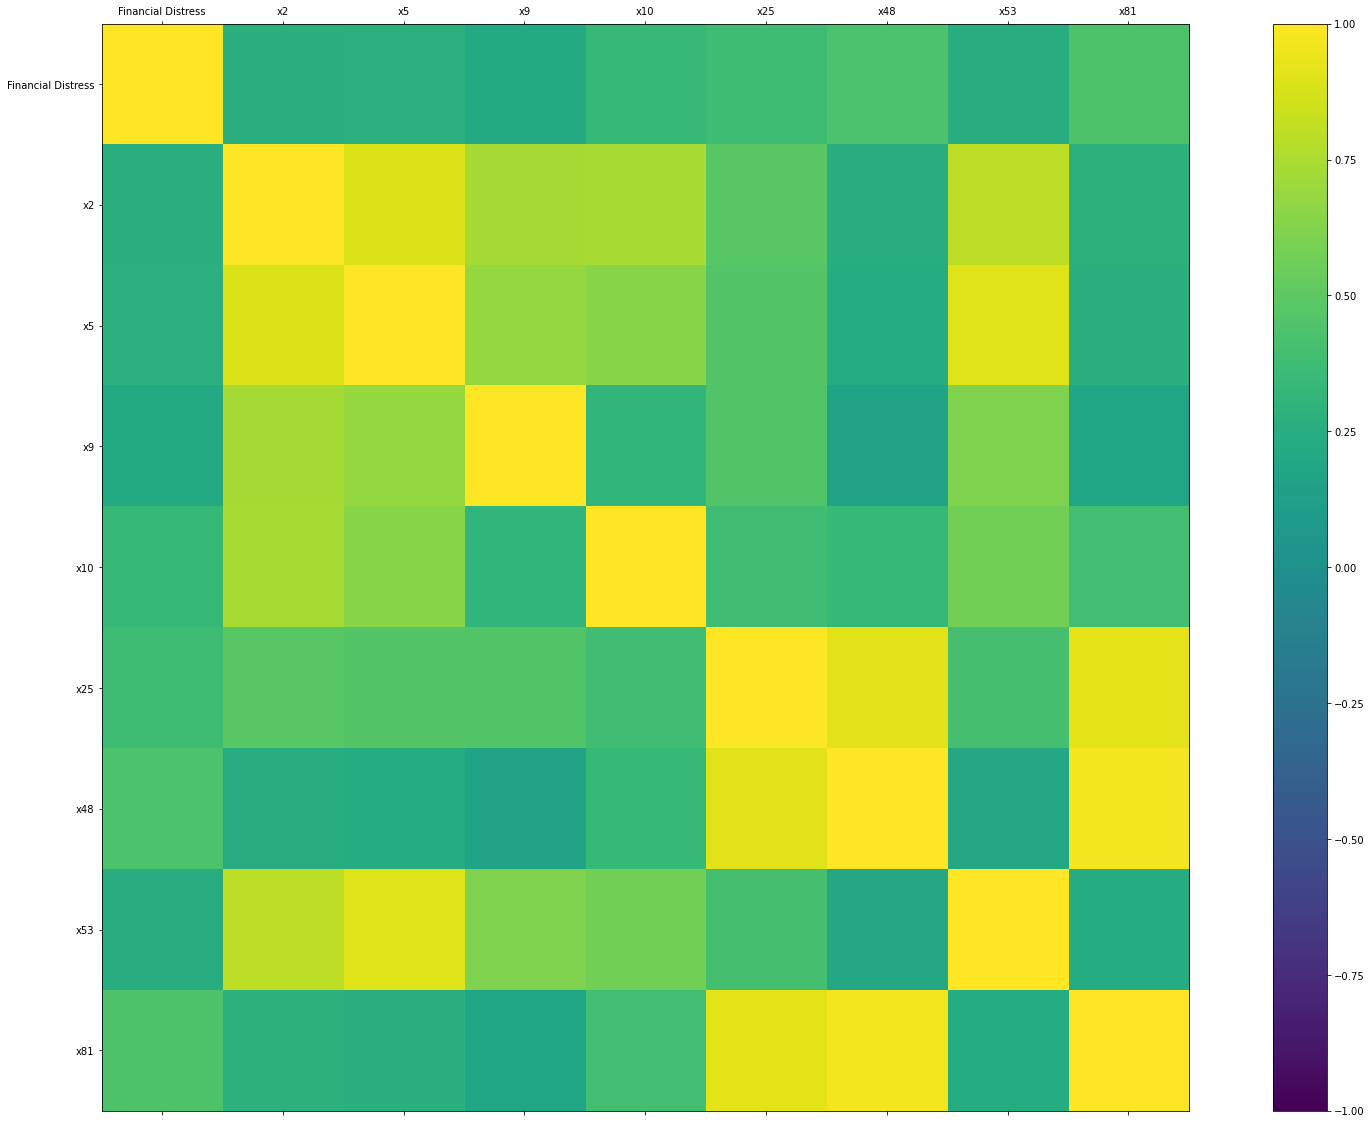

In [11]:
figsize[0] = 30
figsize[1] = 20
plt.rcParams['figure.figsize'] = figsize
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset_1.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = list(dataset_1.columns.values)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

由上图看出 x2,x5,x81 与其他特征的相关性较高，可以删除

In [12]:
dataset_2=dataset_1.copy()
names_a = ["x2","x5","x81"]

dataset_2.drop(names_a, axis=1, inplace=True)


将经营情况变为经营困难与否两种情况，并对特征归一化

In [13]:
from sklearn import preprocessing  
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

array = dataset_2.values
X = array[:, 1:5]
Y = array[:, 0]

for i in range(len(Y)):
    if Y[i]<-0.5:
        Y[i]=0
    else :
        Y[i]=1
min_max_scaler = preprocessing.MinMaxScaler() 
  
X_minMax = min_max_scaler.fit_transform(X)

使用贝叶斯分类器进行预测

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)

# 三部曲
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

a=accuracy_score(ytest, y_model)

print("准确率：",a)

准确率： 0.94880174291939


可以看到预测效果还是不错的

也可以使用K近邻算法进行训练，并进行交叉验证,效果比上一个模型好一些

In [23]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)

res =cross_val_score(model, X, Y, cv=5)

np.mean(res)

0.9616015125396208

下面是不处理数据直接训练的结果

In [33]:
from sklearn.decomposition import PCA
import pandas as pd

array = dataset.values
res = array[:, 1:81]
Y = array[:, 0]

pca = PCA(n_components = 10)
pca.fit(res)

X = pd.DataFrame(pca.transform(res))

for i in range(len(Y)):
    if Y[i]<-0.5:
        Y[i]=0
    else :
        Y[i]=1

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)

# 三部曲
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

a=accuracy_score(ytest, y_model)

print("准确率：",a)

准确率： 0.11220043572984749


总结：这组数据集看似给了很多的特征，但是从上面的图可以看出，其实大部分的特征和经营情况基本没有相关性（相关系数小于0.2），所以我的主要任务就是筛选出有用的特征。所以我进行了两次筛选，第一次是删掉了与经营情况相关系数小于0.2的特征，第二次是根据特征之间的相关系数，删掉了三个相互之间相关性比较高的特征。接下来就是预测，根据经营情况把它们分为经营情况良好和濒临破产两类，进行分类。首先使用了贝叶斯分类器进行预测，精确度可以达到95%，然后使用K近邻算法进行训练，并进行交叉验证，准确度达到96%，可以看到效果还是不错的。最后直接用原始数据降维后进行预测，准确度只有11%。

思政内容：通过这学期的学习，我惊讶的发现数据在可视化加工处理之后可以得到大量之前不曾有的信息，这让我不禁担心我们的信息安全。我了解到，习近平同志曾在全国网络安全和信息化工作会议上发表讲话：“党的十八大以来，党中央重视互联网、发展互联网、治理互联网，统筹协调涉及政治、经济、文化、社会、军事等领域信息化和网络安全重大问题，作出一系列重大决策、提出一系列重大举措，推动网信事业取得历史性成就。”国家信息安全得不到保障,会使国家建设遭受毁灭性打击,并引发其他领域的不安全,如政治失稳、经济紊乱、文化迷失、军事失效、技术落后等。可见,在信息技术广泛渗透于各个领域的条件下,信息安全在国家安全中占居战略地位,已经成为国家安全的基石。